# Movies Recommendation Project


The data we'll be using comes from the wonderful [MovieLens](https://movielens.org/) [user rating dataset](https://grouplens.org/datasets/movielens/). We'll be looking at individual movie ratings later in the notebook, but let us start with how ratings of genres compare to each other.

## Dataset overview
The dataset has two files. We'll import them both into pandas dataframes:

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import helper 

**Import movies Dataset**

In [50]:
movies = pd.read_csv('movies.csv')

**Display first five rows of movies dataset** 

In [51]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Import rating dataset**

In [52]:
ratings = pd.read_csv('ratings.csv')

**Display first five rows of ratings dataset**

In [53]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


**How many records do we have in each of ratings and movies table?**

In [54]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.



## Romance vs. Scifi
Let's start by taking a subset of users, and seeing what their preferred genres are. We're hiding the most data preprocessing in helper functions so the focus is on the topic of clustering. It would be useful if you skim helper.py to see how these helper functions are implemented after finishing this notebook.

Calculate the average rating of **Romance, Scifi** movies

In [55]:
genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()


,avg_romance_rating,avg_scifi_rating
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


The function `get_genre_ratings` calculated each user's average rating of all romance movies and all scifi movies. Let's bias our dataset a little by removing people who like both scifi and romance, just so that our clusters tend to define them as liking one genre more than the other.

In [56]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()                                 

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


So we can see we have 183 users, and for each user we have their average rating of the romance and sci-fi movies they've watched.

Let us plot this dataset:

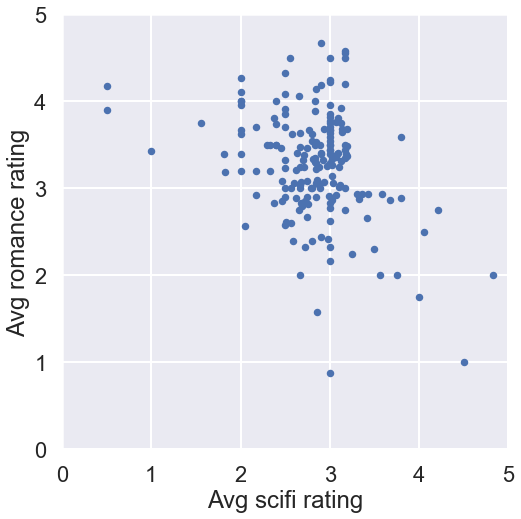

In [57]:
%matplotlib inline
helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')


We can see come clear bias in this sample (that we created on purpose). How would it look if we break the sample down into two groups using k-means?

In [58]:
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values


Import library **KMeans**

In [59]:
from sklearn.cluster import KMeans 

**Create an instance of KMeans to find two clusters**

In [61]:
kmeans_1 = KMeans(n_clusters=2) 

**Use fit_predict to cluster the dataset**


In [62]:
predictions = kmeans_1.fit_predict(X) 

**Display a plot**

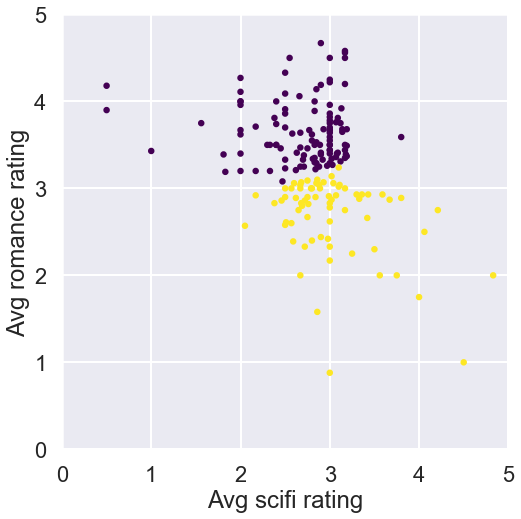

In [63]:
helper.draw_clusters(biased_dataset, predictions)

We can see that the groups are mostly based on how each person rated romance movies. If their average rating of romance movies is over 3 stars, then they belong to one group. Otherwise, they belong to the other group.

What would happen if we break them down into three groups?

**Create an instance of KMeans to find three clusters**


In [64]:
kmeans_2 = KMeans(n_clusters=3)

**Use fit_predict to cluster the dataset**


In [65]:
predictions_2 = kmeans_2.fit_predict(X)

**Display a plot** 

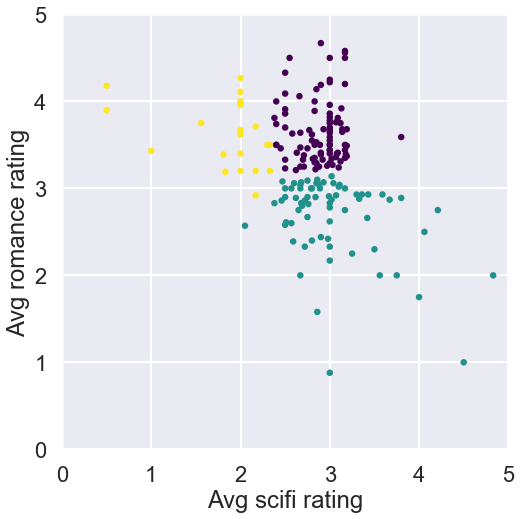

In [66]:
helper.draw_clusters(biased_dataset, predictions_2)

**Create an instance of KMeans to find four clusters**

In [68]:
kmeans_3 = KMeans(n_clusters=4)

**Use fit_predict to cluster the dataset**


In [69]:
predictions_3 = kmeans_3.fit_predict(X)


**Display a plot**

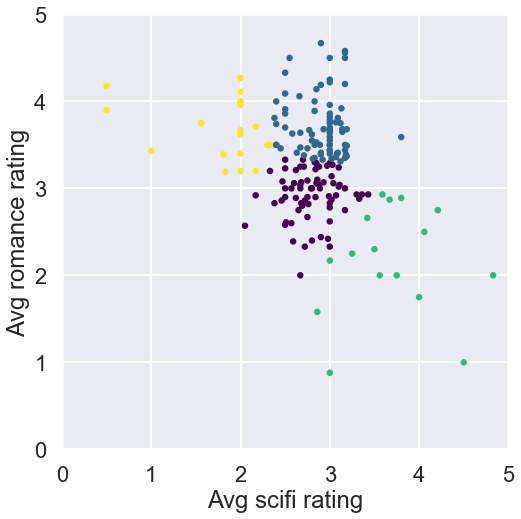

In [70]:
helper.draw_clusters(biased_dataset, predictions_3)

### Silhouette Score

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

Import library **Silhouette_score**

In [71]:
from sklearn.metrics import silhouette_score

In [72]:
s_score = []
for k in range(2, 183, 5):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X) #Create an instance of KMeans to find k clusters with random_state 0 then fit
    s_score.append([k, silhouette_score(X, kmeans.labels_)])
    

/Users/faizan/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: ConvergenceWarning: Number of distinct clusters (178) found smaller than n_clusters (182). Possibly due to duplicate points in X.
  return_n_iter=True)


In [73]:
s_score

[[2, 0.3558817876472825],
 [7, 0.38953342844609656],
 [12, 0.3581974687657583],
 [17, 0.3502856136343623],
 [22, 0.3617421566757448],
 [27, 0.36693813543174936],
 [32, 0.3776980303487645],
 [37, 0.35975988674633536],
 [42, 0.372279308070513],
 [47, 0.39490936357676387],
 [52, 0.36759244077425984],
 [57, 0.3581625729665141],
 [62, 0.36103500283024587],
 [67, 0.3623546060941169],
 [72, 0.34422649399045513],
 [77, 0.34640246785935286],
 [82, 0.34444423754545006],
 [87, 0.32948512980500305],
 [92, 0.3230791029760401],
 [97, 0.31614756830696206],
 [102, 0.3126433371386654],
 [107, 0.3005833276430467],
 [112, 0.2982495255455439],
 [117, 0.2802650173585646],
 [122, 0.2675303015141549],
 [127, 0.26416818251997415],
 [132, 0.2569510743702076],
 [137, 0.2361166020024426],
 [142, 0.21659990220950903],
 [147, 0.19908335270651936],
 [152, 0.18372286145212785],
 [157, 0.1641628841708429],
 [162, 0.1556499460286296],
 [167, 0.12920960729951275],
 [172, 0.09984309419914657],
 [177, 0.0642301201631745]

In [74]:
import seaborn as sns
sns.set() 


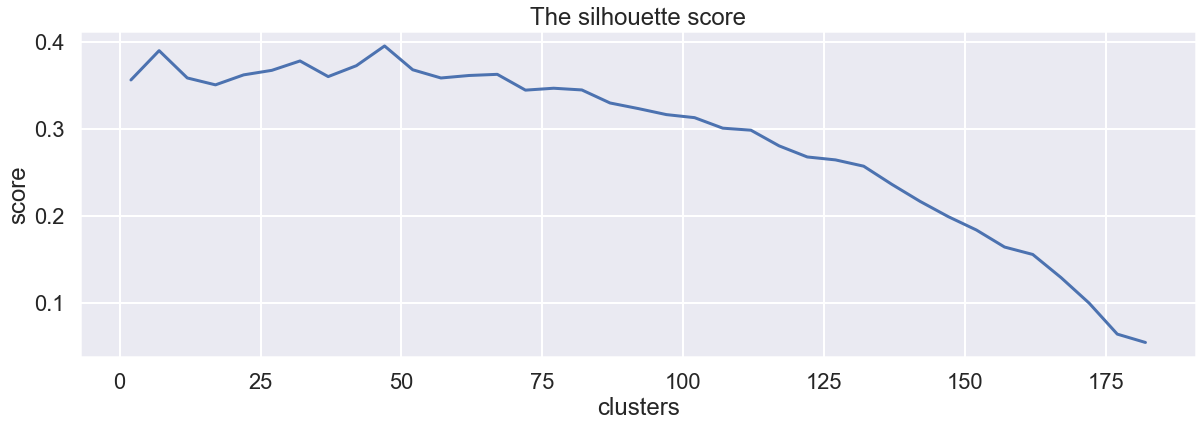

In [75]:
plt.figure(figsize=(20,6))
sns.set_context('poster')
plt.plot( pd.DataFrame(s_score)[0], pd.DataFrame(s_score)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score') 
plt.show()


Looking at this graph, So you should select the number of clusters that maximizes the silhouette coefficient
good choices include 7, 47 amongst other values (with a slight variation between different runs).Our pick would be k=7 because it's easier to visualize:       
What would you prefer 7 or 47??

**Create an instance of KMeans to find seven clusters**

In [76]:
kmeans_4 = KMeans(n_clusters=7)

**Use fit_predict to cluster the dataset**

In [77]:
predictions_4 = kmeans_4.fit_predict(X)

**Display a plot**

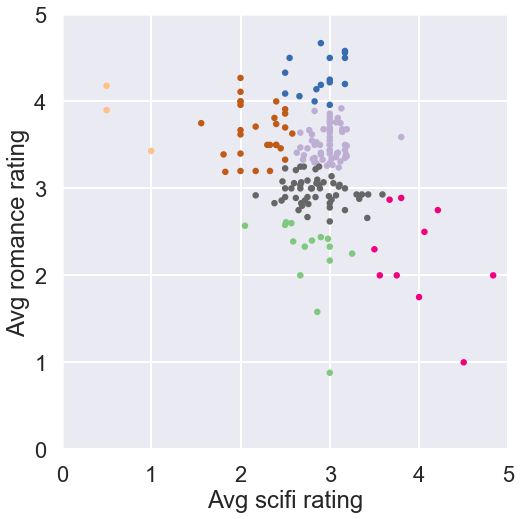

In [78]:
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent')

Note: As you try to plot larger values of k (more than 10), you'll have to make sure your plotting library is not reusing colors between clusters. For this plot, we had to use the [matplotlib colormap](https://matplotlib.org/examples/color/colormaps_reference.html) 'Accent' because other colormaps either did not show enough contrast between colors, or were recycling colors past 8 or 10 clusters.


## Throwing some Action into the mix
So far, we've only been looking at how users rated romance and scifi movies. Let's throw another genre into the mix. Let's add the Action genre.

Our dataset now looks like this:

In [79]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [80]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                                           'avg_romance_rating', 
                                                           'avg_action_rating']].values

**Create an instance of KMeans to find seven clusters**

In [81]:
kmeans_5 = KMeans(n_clusters=7)

**Use fit_predict to cluster the dataset 'X_with_action'**


In [82]:
predictions_5 = kmeans_5.fit_predict(X_with_action)

**Display a plot**

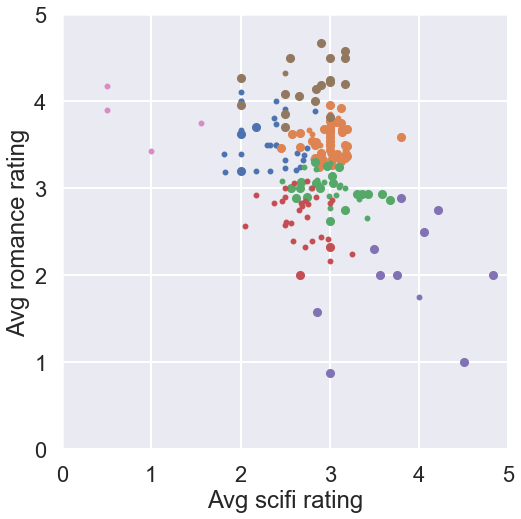

In [83]:
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

We're still using the x and y axes for scifi and romance respectively. We are using the size of the dot to roughly code the 'action' rating (large dot for avg ratings over than 3, small dot otherwise).


### Multi Level Clustering    
Now that we've established some trust in how k-means clusters users based on their genre tastes, let's take a bigger bite and look at how users rated individual movies. To do that, we'll shape the dataset in the form of userId vs user rating for each movie. For example, let's look at a subset of the dataset:

In [85]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


The dominance of NaN values presents the first issue. Most users have not rated and watched most movies. Datasets like this are called "sparse" because only a small number of cells have values. 

To get around this, let's sort by the most rated movies, and the users who have rated the most number of movies. That will present a more 'dense' region when we peak at the top of the dataset.

If we're to choose the most-rated movies vs users with the most ratings, it would look like this:

In [86]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0


That's more like it. Let's also establish a good way for visualizing these ratings so we can attempt to visually recognize the ratings (and later, clusters) when we look at bigger subsets.

Let's use colors instead of the number ratings:

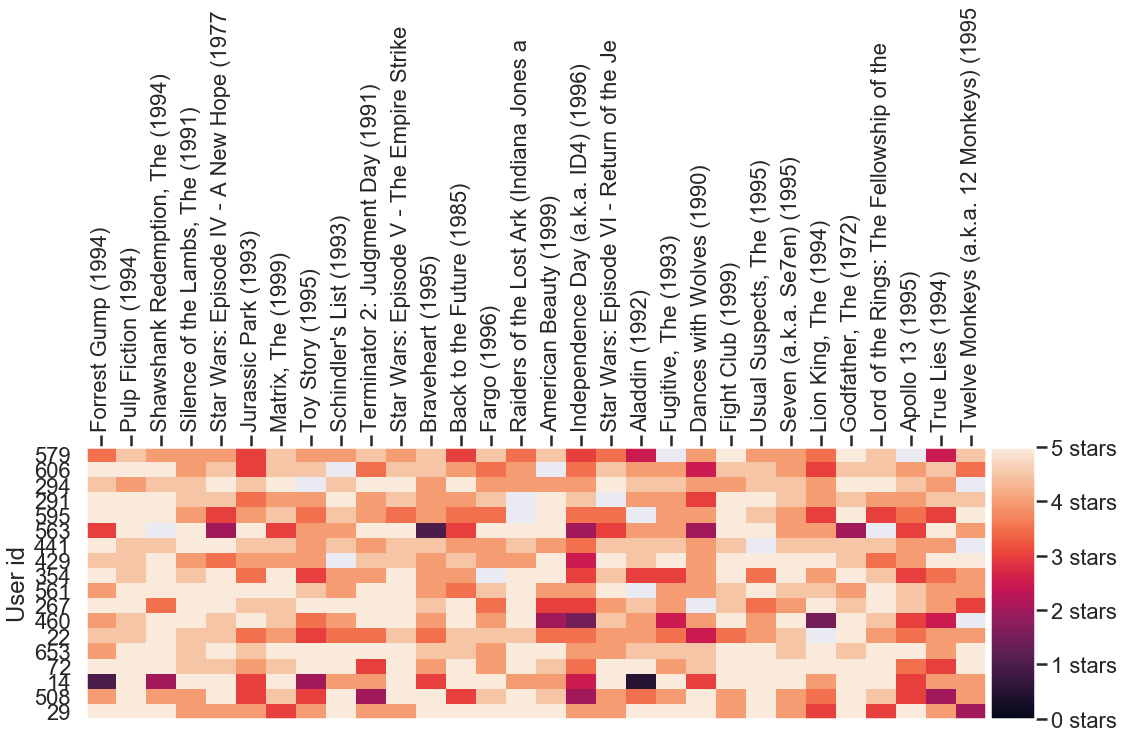

In [87]:
helper.draw_movies_heatmap(most_rated_movies_users_selection);

Each column is a movie. Each row is a user. The color of the cell is how the user rated that movie based on the scale on the right of the graph.

Notice how some cells are white? This means the respective user did not rate that movie. This is an issue you'll come across when clustering in real life. Unlike the clean example we started with, real-world datasets can often be sparse and not have a value in each cell of the dataset. This makes it less straightforward to cluster users directly by their movie ratings as k-means generally does not like missing values.

For performance reasons, we'll only use ratings for 1000 movies (out of the 9000+ available in the dataset).

In [88]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)

To have sklearn run k-means clustering to a dataset with missing values like this, we will first cast it to the [sparse csr matrix](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.sparse.csr_matrix.html) type defined in the SciPi library. 

To convert from a pandas dataframe to a sparse matrix, we'll have to convert to SparseDataFrame, then use pandas' `to_coo()` method for the conversion.

Note: `to_coo()` was only added in later versions of pandas. If you run into an error with the next cell, make sure pandas is up to date.

In [89]:
from scipy.sparse import csr_matrix

In [90]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

## Let's cluster!
With k-means, we have to specify k, the number of clusters. Let's arbitrarily try k=10 


Make 10 clusters of the Sparsed Data Set and apply fit_predict() function on it.

In [91]:
predictions = KMeans(n_clusters= 10, random_state=0).fit_predict(sparse_ratings)

cluster # 7
# of users in cluster: 296. # of users in plot: 70


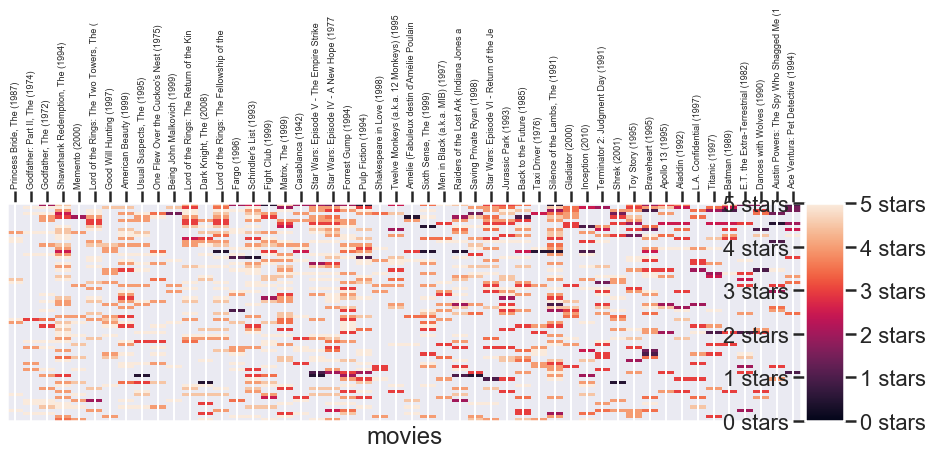

cluster # 0
# of users in cluster: 82. # of users in plot: 70


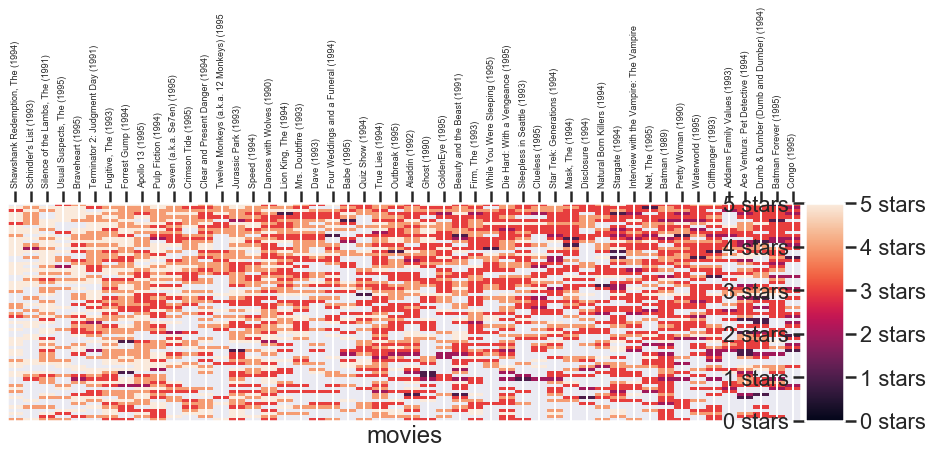

cluster # 1
# of users in cluster: 89. # of users in plot: 70


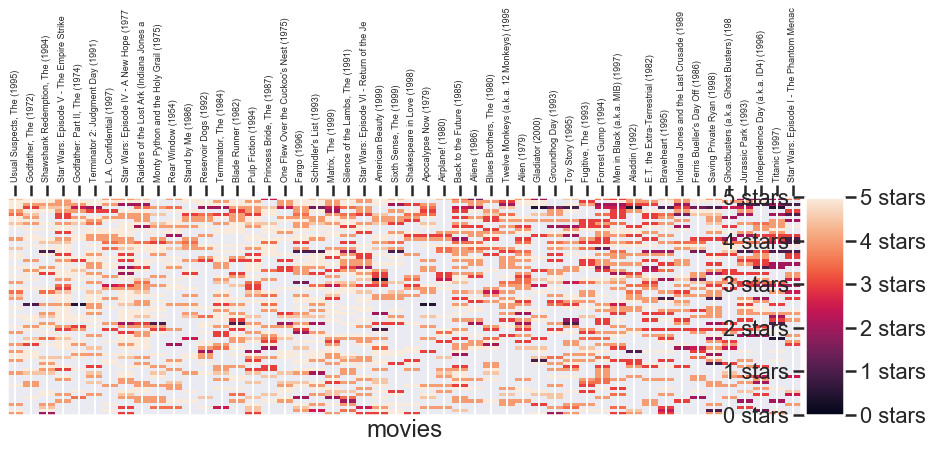

cluster # 4
# of users in cluster: 83. # of users in plot: 70


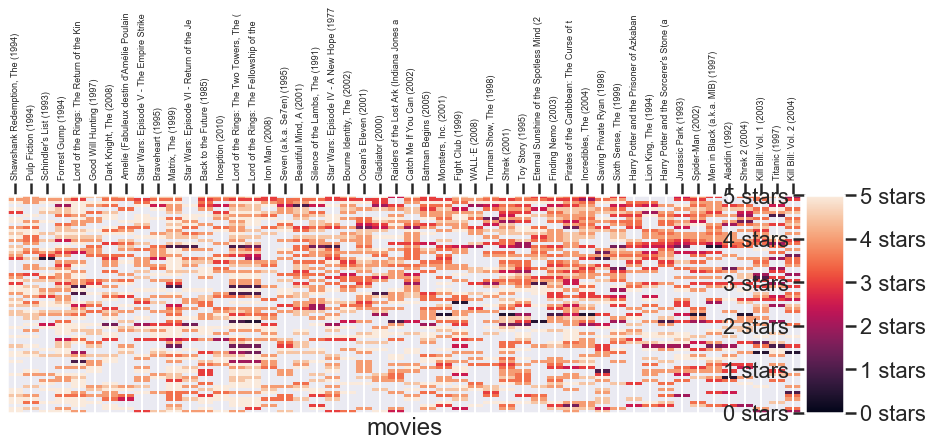

cluster # 3
# of users in cluster: 23. # of users in plot: 23


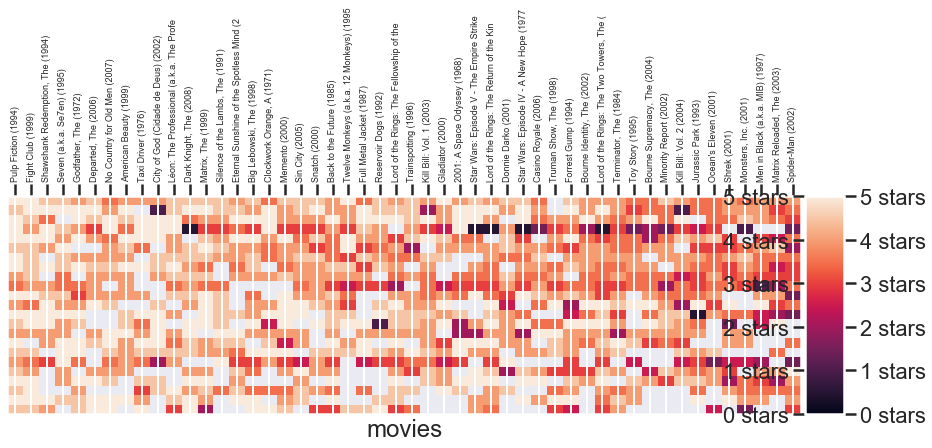

cluster # 2
# of users in cluster: 36. # of users in plot: 36


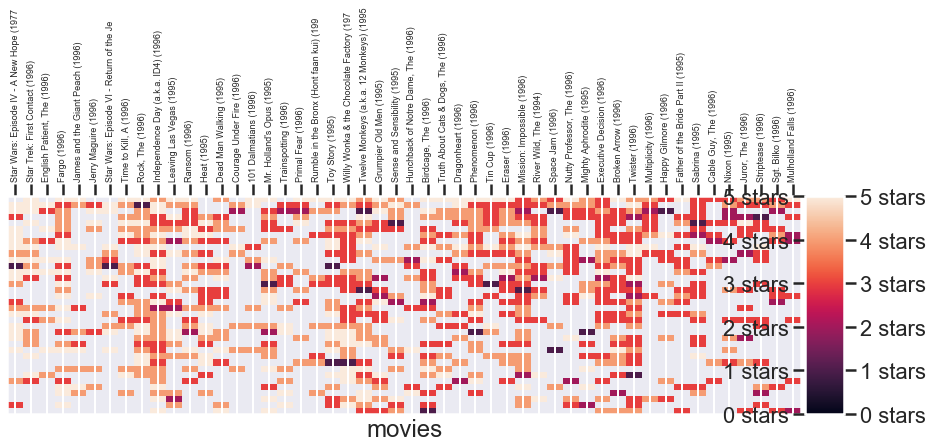

cluster # 5
# of users in cluster: 24. # of users in plot: 24


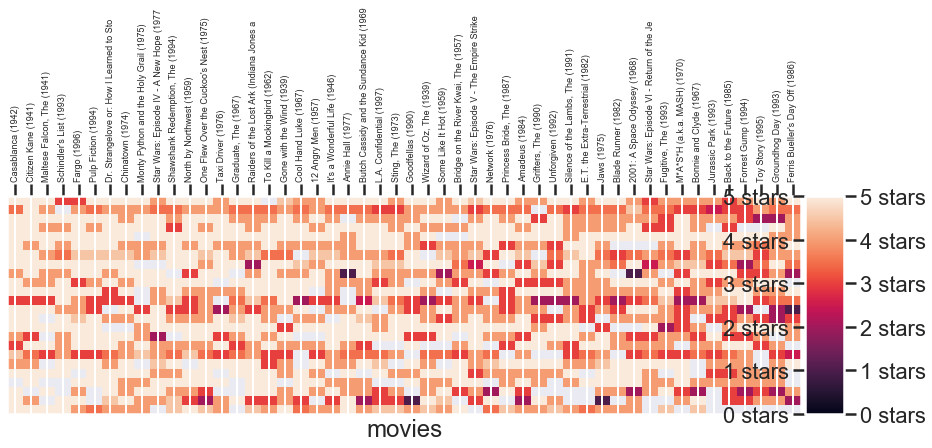

cluster # 6
# of users in cluster: 28. # of users in plot: 28


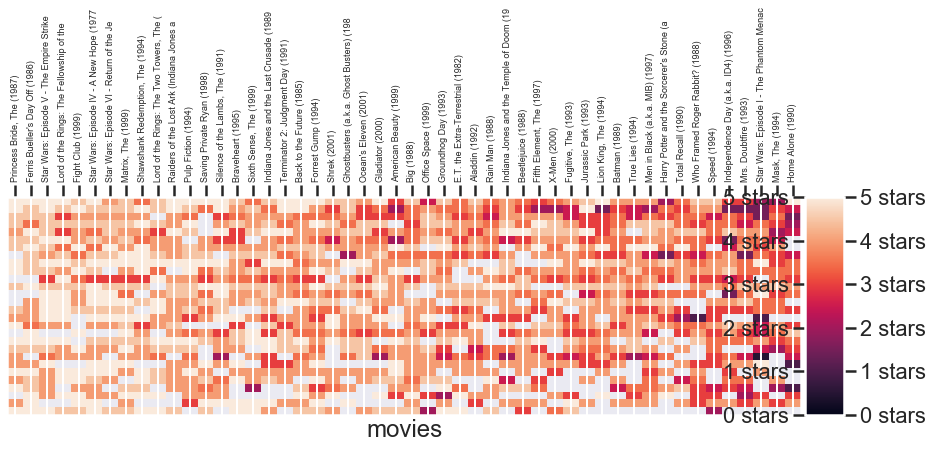

In [92]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

**Count the number of clusters in "group"**

In [93]:
clustered['group'].value_counts()

7    296
1     89
4     83
0     82
2     36
6     28
5     24
3     23
8      7
9      3
Name: group, dtype: int64

There are several things to note here:
* The more similar the ratings in a cluster are, the more **vertical** lines in similar colors you'll be able to trace in that cluster. 
* It's super interesting to spot trends in clusters:
 * Some clusters are more sparse than others, containing people who probably watch and rate less movies than in other clusters.
 * Some clusters are mostly peach and bring together people who really love a certain group of movies. Other clusters are mostly orange or pink meaning they contain people who agree that a certain set of movies deserves 2-3 stars.
 * Note how the movies change in every cluster. The graph filters the data to only show the most rated movies, and then sorts them by average rating.
 * Can you track where the Lord of the Rings movies appear in each cluster? What about Star Wars movies?
* It's easy to spot **horizontal** lines with similar colors, these are users without a lot of variety in their ratings. This is likely one of the reasons for Netflix switching from a stars-based ratings to a thumbs-up/thumbs-down rating. A rating of four stars means different things to different people.
* We did a few things to make the clusters visibile (filtering/sorting/slicing). This is because datasets like this are "sparse" and most cells do not have a value (because most people did not watch most movies). 

## Prediction
Let's pick a cluster and a specific user and see what useful things this clustering will allow us to do.

Let's first pick a cluster:

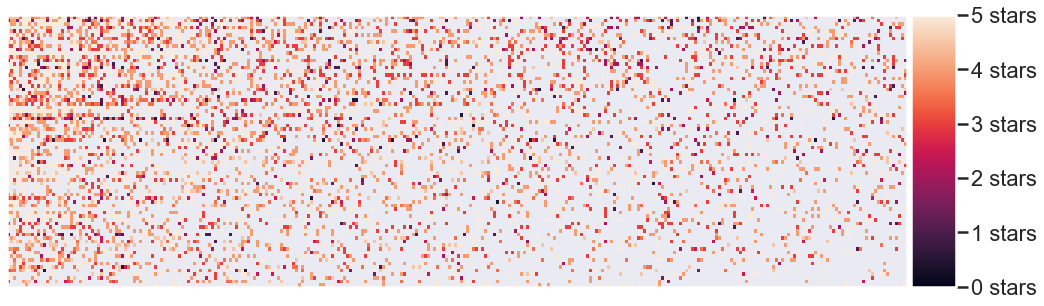

In [94]:
#Picking a cluster ID from the clusters above
cluster_number = 1

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

In [95]:
cluster.fillna('').head()

,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),"Matrix, The (1999)",Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Back to the Future (1985),American Beauty (1999),Fargo (1996),Pulp Fiction (1994),Forrest Gump (1994),Star Wars: Episode VI - Return of the Jedi (1983),...,Dave (1993),Caddyshack (1980),Logan's Run (1976),Ocean's Eleven (2001),"Mummy, The (1999)",Cocoon (1985),Unbreakable (2000),Ransom (1996),Lone Star (1996),"20,000 Leagues Under the Sea (1954)"
42,4,4.5,4.5,4.5,3.5,5,5,5,3.5,4,...,,,,,,,4.5,,,
39,2,4,4,2,,5,5,5,2,,...,3,,,,,,,,,
22,5,4,4,5,4,5,5,4,,4,...,,3,,,,4,,4,4,
25,5,,5,,,5,5,5,4,,...,,,,,1,,3,3,,
61,5,4,2,5,3,,4,4,,4,...,2,,,,4,,,,,


Pick a blank cell from the table. It's blank because that user did not rate that movie. Can we predict whether she would like it or not? Since the user is in a cluster of users that seem to have similar taste, we can take the average of the votes for that movie in this cluster, and that would be a reasonable predicition for much she would enjoy the film.

In [96]:

movie_name = "Forrest Gump (1994)"

cluster[movie_name].mean()

3.8333333333333335

And this would be our prediction for how she'd rate the movie.

## Recommendation
Let's reiterate what we did in the previous step. We have used k-means to cluster users according to their ratings. This lead us to clusters of users with similar ratings and thus generally a similar taste in movies. Based on this, when one user did not have a rating for a certain movie  we averaged the ratings of all the other users in the cluster, and that was our guess to how this one user would like the movie.

Using this logic, if we calculate the average score in this cluster for every movie, we'd have an understanding for how this 'taste cluster' feels about each movie in the dataset. 


In [97]:
cluster.mean().head(20)

Star Wars: Episode IV - A New Hope (1977)                                         4.321429
Star Wars: Episode V - The Empire Strikes Back (1980)                             4.394231
Matrix, The (1999)                                                                4.159574
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    4.318182
Back to the Future (1985)                                                         4.031915
American Beauty (1999)                                                            4.212766
Fargo (1996)                                                                      4.291667
Pulp Fiction (1994)                                                               4.293478
Forrest Gump (1994)                                                               3.833333
Star Wars: Episode VI - Return of the Jedi (1983)                                 4.215909
Saving Private Ryan (1998)                                                        3.595238

This becomes really useful for us because we can now use it as a recommendation engine that enables our users to discover movies they're likely to enjoy.

When a user logs in to our app, we can now show them recommendations that are appropriate to their taste. The formula for these recommendations is to select the cluster's highest-rated movies that the user did not rate yet.


In [98]:
# Picking a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
user_id = 1

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').iloc[:,-1]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

African Queen, The (1951)                                                      4.750000
Chinatown (1974)                                                               4.647059
Cool Hand Luke (1967)                                                          4.607143
Roger & Me (1989)                                                              4.566667
Run Lola Run (Lola rennt) (1998)                                               4.529412
Usual Suspects, The (1995)                                                     4.527027
Godfather, The (1972)                                                          4.486111
Boys Don't Cry (1999)                                                          4.461538
Citizen Kane (1941)                                                            4.456522
Boot, Das (Boat, The) (1981)                                                   4.454545
Goodfellas (1990)                                                              4.442308
It's a Wonderful Life (1946)    

In [48]:
user_2_ratings.isnull().sum()

239

And these are our top 20 recommendations to the user!
